# Vishesh Jung Thapa

## Research question/interests

Looking at the employees and its impact on revenue and profits.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
url = "../data/raw/Fortune 1000 Companies by Revenue.csv"

In [ ]:
df = pd.read_csv(url)

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   rank                    1000 non-null   object
 1   name                    1000 non-null   object
 2   revenues                1000 non-null   object
 3   revenue_percent_change  1000 non-null   object
 4   profits                 1000 non-null   object
 5   profits_percent_change  1000 non-null   object
 6   assets                  1000 non-null   object
 7   market_value            1000 non-null   object
 8   change_in_rank          1000 non-null   object
 9   employees               1000 non-null   object
dtypes: object(10)
memory usage: 78.2+ KB


,rank,name,revenues,revenue_percent_change,profits,profits_percent_change,assets,market_value,change_in_rank,employees
0,1,Walmart,"$572,754",2.40%,"$13,673",1.20%,"$244,860","$409,795",-,"2,300,000"
1,2,Amazon,"$469,822",21.70%,"$33,364",56.40%,"$420,549","$1,658,807.30",-,"1,608,000"
2,3,Apple,"$365,817",33.30%,"$94,680",64.90%,"$351,002","$2,849,537.60",-,"154,000"
3,4,CVS Health,"$292,111",8.70%,"$7,910",10.20%,"$232,999","$132,839.20",-,"258,000"
4,5,UnitedHealth Group,"$287,597",11.80%,"$17,285",12.20%,"$212,206","$479,830.30",-,"350,000"


In [ ]:
df.describe().T

,count,unique,top,freq
rank,1000,997,466,2
name,1000,1000,Walmart,1
revenues,1000,993,"$7,156",2
revenue_percent_change,1000,556,-,8
profits,1000,965,-,3
profits_percent_change,1000,641,-,273
assets,1000,997,"$13,223",2
market_value,1000,956,-,45
change_in_rank,1000,276,-,80
employees,1000,763,"14,000",8


In [ ]:
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv(url)
df['revenues'] = df['revenues'].str.replace(',', '').str.replace('$', '').astype(float)
df['profits'] = df['profits'].replace('-', np.nan)
df['profits'] = df['profits'].str.replace('(', '').str.replace(')', '')
df['profits'] = df['profits'].str.replace(',', '').str.replace('$', '').astype(float)
df['assets'] = df['assets'].str.replace(',', '').str.replace('$', '').astype(float)
df['market_value'] = df['market_value'].replace('-', np.nan)
df['market_value'] = df['market_value'].str.replace(',', '').str.replace('$', '').astype(float)
df['employees'] = df['employees'].replace('-', np.nan)
df['employees'] = df['employees'].str.replace(',', '').astype(float)
df['revenue_percent_change'] = df['revenue_percent_change'].replace('-', np.nan)
df['revenue_percent_change'] = df['revenue_percent_change'].str.replace('%', '').astype(float)
df['profits_percent_change'] = df['profits_percent_change'].replace('-', np.nan)
df['profits_percent_change'] = df['profits_percent_change'].str.replace('%', '').astype(float)
df['change_in_rank'] = df['change_in_rank'].replace('-', np.nan)

df = df.dropna(subset=['revenues', 'revenue_percent_change', 'profits','profits_percent_change', 'assets', 'market_value', 'employees'])
df

,rank,name,revenues,revenue_percent_change,profits,profits_percent_change,assets,market_value,change_in_rank,employees
0,1,Walmart,572754.0,2.4,13673.0,1.2,244860.0,409795.0,NaN,2300000.0
1,2,Amazon,469822.0,21.7,33364.0,56.4,420549.0,1658807.3,NaN,1608000.0
2,3,Apple,365817.0,33.3,94680.0,64.9,351002.0,2849537.6,NaN,154000.0
3,4,CVS Health,292111.0,8.7,7910.0,10.2,232999.0,132839.2,NaN,258000.0
4,5,UnitedHealth Group,287597.0,11.8,17285.0,12.2,212206.0,479830.3,NaN,350000.0
...,...,...,...,...,...,...,...,...,...,...
991,992,Beazer Homes USA,2140.3,0.6,122.0,133.6,2078.8,478.8,-61,1052.0
992,993,Chemed,2139.3,2.9,268.6,-15.9,1342.7,7592.5,-49,14137.0
995,996,Vizio Holding,2124.0,4.0,39.4,-138.4,935.8,1705.1,NaN,800.0
996,997,1-800-Flowers.com,2122.2,42.5,118.7,101.1,1076.7,830.0,NaN,4800.0


In [ ]:
import project_functions1
df =  project_functions1.load_and_process(url)
df.describe()

,revenues,revenue_percent_change,profits,profits_percent_change,assets,market_value,employees,revenue_over_profit,market_over_asset
count,688.000000,688.000000,688.000000,688.000000,6.880000e+02,6.880000e+02,6.880000e+02,688.000000,688.000000
mean,19431.373401,20.961047,2626.288081,338.974855,7.004708e+04,5.477251e+04,4.094729e+04,16.723604,1.801162
std,44721.783523,34.522314,7436.514037,2831.654260,3.110447e+05,1.869759e+05,1.230879e+05,31.039718,2.145690
min,2112.800000,-39.900000,12.500000,-989.100000,4.138000e+02,3.719000e+02,3.470000e+02,0.688311,0.000169
25%,3732.375000,6.375000,367.775000,10.175000,4.936175e+03,5.379650e+03,7.207250e+03,5.522112,0.583136
50%,6811.800000,14.850000,783.000000,41.250000,1.252010e+04,1.578655e+04,1.411850e+04,9.278985,1.144177
75%,15760.250000,25.625000,1916.075000,116.875000,3.465050e+04,4.094462e+04,3.100000e+04,16.373610,2.120141
max,572754.000000,513.700000,94680.000000,49978.900000,4.229166e+06,2.849538e+06,2.300000e+06,425.196744,18.910758


# Looking at the Relationship between Employees and Revenue

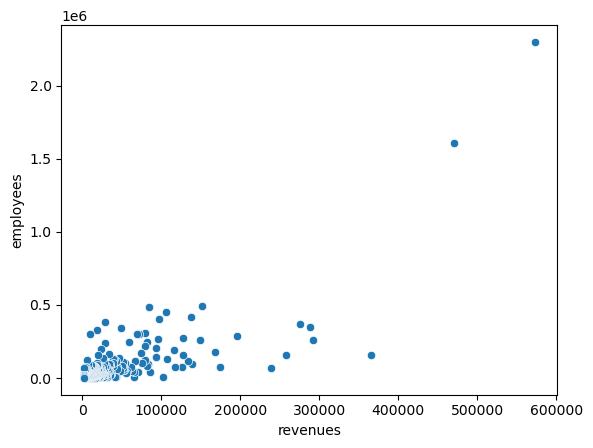

In [ ]:
sns.scatterplot(x = df['revenues'], y=df['employees']).get_figure().savefig("graph1.png")


As can be seen here the data is very sparse and a few outliers are pulling the data too far to see any visual relationships.
## Lets look in the 0 to 2000 range

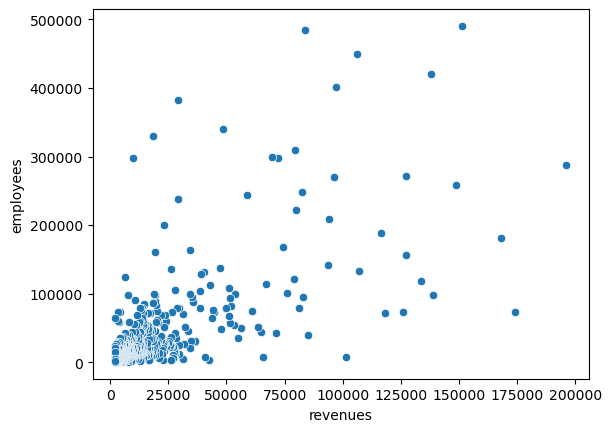

In [ ]:
df_rel = pd.DataFrame(df, columns=['revenues', 'employees'])
df_rel = df_rel.drop(df_rel['revenues'].loc[(df_rel['revenues'] > 200000)].index)
sns.scatterplot(x = df_rel['revenues'], y=df_rel['employees']).get_figure().savefig("graph2.png")

From this plot it can be seen that no real relationship can be seen between revenue and the number of employees. There are companies that have high revenue but relatively low employees. This is espically seen at (175000, 100000)

# Lets look more closely at the 0 to 25000 revenue range

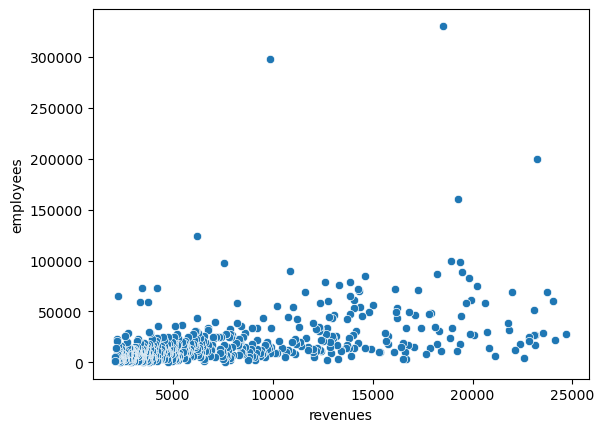

In [ ]:
df_rel = df_rel.drop(df_rel['revenues'].loc[(df_rel['revenues'] > 25000)].index)
sns.scatterplot(x = df_rel['revenues'], y=df_rel['employees']).figure.savefig("graph3.png")

Here we can see that as revenue increases there is a slight growth in the number of employees. There seems to be a very week correlation between revenue and the number of employees. We can look even closer by removing some of the companies that have more than 50,000 employees

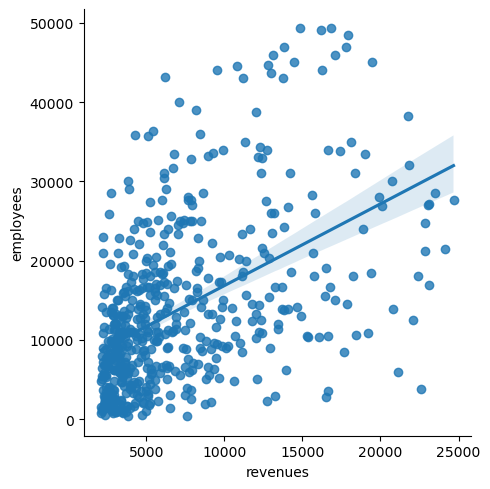

In [ ]:
df_rel = df_rel.drop(df_rel['employees'].loc[(df_rel['employees'] > 50000)].index)
sns.lmplot(data = df_rel,x = 'revenues', y='employees').figure.savefig("graph4.png")


Here we can see at there seems to be avery weak relationship between the revenue and the number of employees. On average it can be seen that as the revenue increases that the number of employees also steadily increases. However, the relationship doesn't seem to be very strong as there are many companies that have a low number of employees with a high revenues. This would make sense as there are industries like the tech industry that can generate large amount of revenue with a very small team. On the flip side there are companies like Walmart which also generate large amount of revenue but neeed giant teams of people working in different places. Thus in the revenue range of 5000 to 25000 we can say there is a slightly positive correlation between revenue and the number of employees. 

# Lets look at the area below 10,000 employees and below 10,000 in revenue.

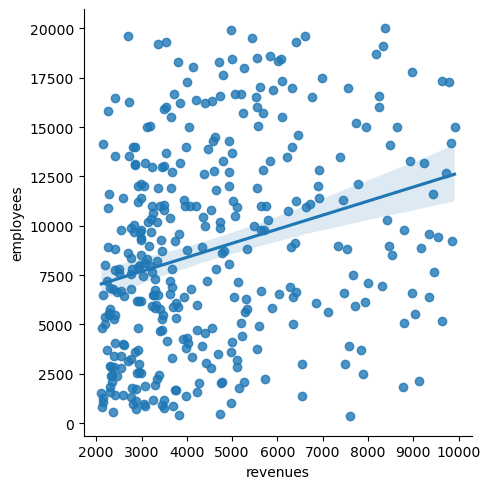

In [ ]:
df_rel = df_rel.drop(df_rel['employees'].loc[(df_rel['employees'] > 20000)].index)
df_rel = df_rel.drop(df_rel['revenues'].loc[(df_rel['revenues'] > 10000)].index)

sns.lmplot(data = df_rel,x = 'revenues', y='employees').figure.savefig("graph5.png")

Here we can see the relationship only gets worse as the number of employees increases very slowly with revenue. However, a postive correlation can be seen. This would make sense for many companies such that a higher revenue means that more work needs to be done thus more employees are needed. 

# We can repeat this steps but this time with profits

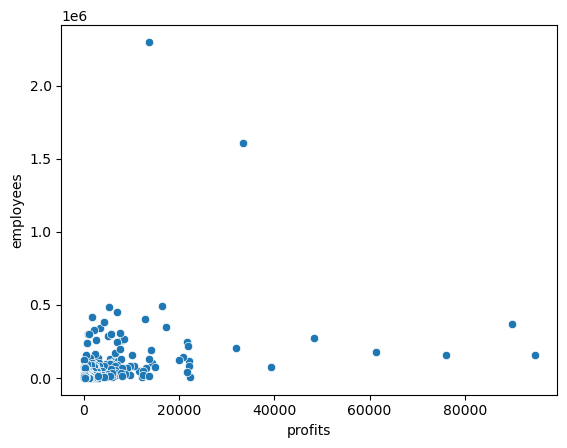

In [ ]:
df_rel = pd.DataFrame(df, columns=['profits', 'employees'])
sns.scatterplot(x = df_rel['profits'], y=df_rel['employees']).get_figure().savefig("graph6.png")

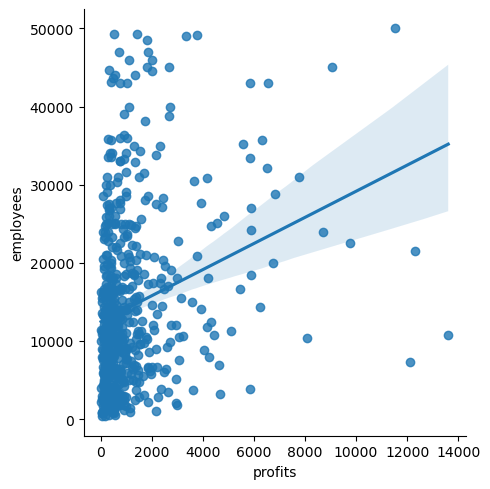

In [ ]:
df_rel = df_rel.drop(df_rel['profits'].loc[(df_rel['profits'] > 20000)].index)
df_rel = df_rel.drop(df_rel['employees'].loc[(df_rel['employees'] > 50000)].index)

sns.lmplot(data = df_rel,x = 'profits', y='employees').figure.savefig("graph7.png")

Here we can see that there is a correlation between profits and the number of employees. However much like revenue, there seems to be a very week correlation. Addtionally, there are many companies that have less than 4000 in profits but have large number of emplyees we can look deeper into this range. 


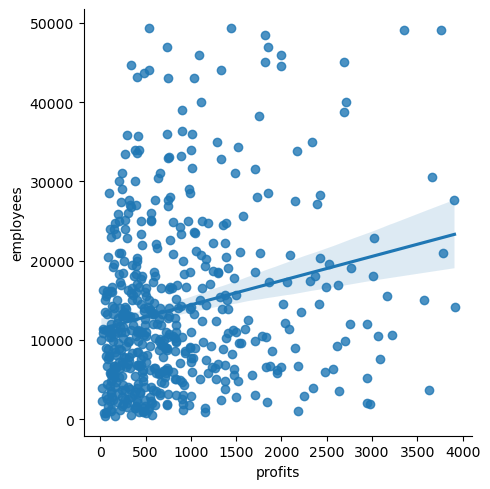

In [ ]:
df_rel = df_rel.drop(df_rel['profits'].loc[(df_rel['profits'] > 4000)].index)


sns.lmplot(data = df_rel,x = 'profits', y='employees').figure.savefig("graph8.png")

Here we can see that the relationship between profits and the number of employees stagnates quite a bit. There is a very weak correlation between profits and the number of employees and much like the previous graph. Many of the companies that have lower profits seem to have a large number of employees. Thus we cannot determin a particular relationship between profits and the number of employees. 

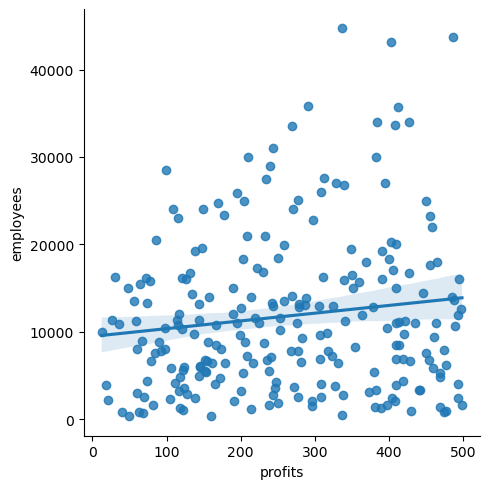

In [ ]:
df_rel = df_rel.drop(df_rel['profits'].loc[(df_rel['profits'] > 500)].index)


sns.lmplot(data = df_rel,x = 'profits', y='employees').figure.savefig("graph9.png")

In conclusion, the number of employees and the revenue seem to have a weak positive correlation. A large revenue useally indicates a larger number of employees. In the revenue ranges of 5000 to 25000 there is a slight correlation. However, in the rnages of 2000 to 10000 this correlation decresaes substancially. This is most likely due to the different industries that many of the companies are in. Companies that are bick and motar would require many more employees than something like a software company. 

When it comes to profits the relationship is even more weaker. This would make sense as profits will be cut by the number of employees. However, there is a very slight postivie correlation in the profit ranges of 2000 14000. However, as the profit ranges decreases the correlationship seems to be non existant being only slightly positive. Thus when it comes to employees and profits no substancial relationship can be observed. 

In [ ]:
df.to_csv('../data/processed/fortune100data.csv')